# Lesson 11 Assessment

## Import all the necessary liabraries

In [41]:
import pandas as pd

In [42]:
from scipy import stats 

In [43]:
import matplotlib.pyplot as plt

In [44]:
import seaborn as sns

## 1.Load the dataset and explore the data.


In [45]:
employee_productivity_df = pd.read_csv(r'C:\Users\Itumeleng.Sekoma\Desktop\Test777777\.ipynb_checkpoints\employee_productivity_dataset.csv')
employee_productivity_df.head()

,Employee_ID,Pre_Training_Score,Post_Training_Score
0,1,74.97,86.97
1,2,68.62,78.24
2,3,76.48,81.78
3,4,85.23,87.00
4,5,67.66,76.15


In [46]:
employee_productivity_df.tail()

,Employee_ID,Pre_Training_Score,Post_Training_Score
995,996,67.19,77.54
996,997,87.98,92.85
997,998,76.41,77.00
998,999,64.29,68.47
999,1000,75.73,77.01


In [47]:
employee_productivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee_ID          1000 non-null   int64  
 1   Pre_Training_Score   1000 non-null   float64
 2   Post_Training_Score  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [48]:
employee_productivity_df.describe()

,Employee_ID,Pre_Training_Score,Post_Training_Score
count,1000.000000,1000.000000,1000.000000
mean,500.500000,70.193260,75.547380
std,288.819436,9.792202,10.808161
min,1.000000,37.590000,45.280000
25%,250.750000,63.520000,68.485000
50%,500.500000,70.255000,75.480000
75%,750.250000,76.482500,82.322500
max,1000.000000,108.530000,122.280000


In [49]:
print("This DataFrame consists of: ", employee_productivity_df.shape[0], " Observations, and:",employee_productivity_df.shape[1]," Fields")

This DataFrame consists of:  1000  Observations, and: 3  Fields


## 2.Formulate null and alternative hypotheses.


### 2.1 My H0 (Null Hypothesis) is: The new training program does not significantly improve employee performance

### 2.2 My H1 (Alternative Hypothesis) is: The new training program does significantly improve employee performance

## 3.Conduct a paired t-test to compare pre- and post-training scores.


### 3.1 Extract pre and post test scores

In [50]:
pre_training_score = employee_productivity_df['Pre_Training_Score']
pre_training_score

0      74.97
1      68.62
2      76.48
3      85.23
4      67.66
       ...  
995    67.19
996    87.98
997    76.41
998    64.29
999    75.73
Name: Pre_Training_Score, Length: 1000, dtype: float64

In [51]:
post_training_score = employee_productivity_df['Post_Training_Score']
post_training_score

0      86.97
1      78.24
2      81.78
3      87.00
4      76.15
       ...  
995    77.54
996    92.85
997    77.00
998    68.47
999    77.01
Name: Post_Training_Score, Length: 1000, dtype: float64

### 3.2 Conduct a t-test

In [52]:
t_stat, p_value = stats.ttest_rel(pre_training_score,post_training_score)
print(f"T-statistic:{t_stat} \nP-value:{p_value}")

T-statistic:-33.94856516226314 
P-value:1.3042718223108973e-168


### 3.3 Visualize the pre and post test scores uing a boxplot

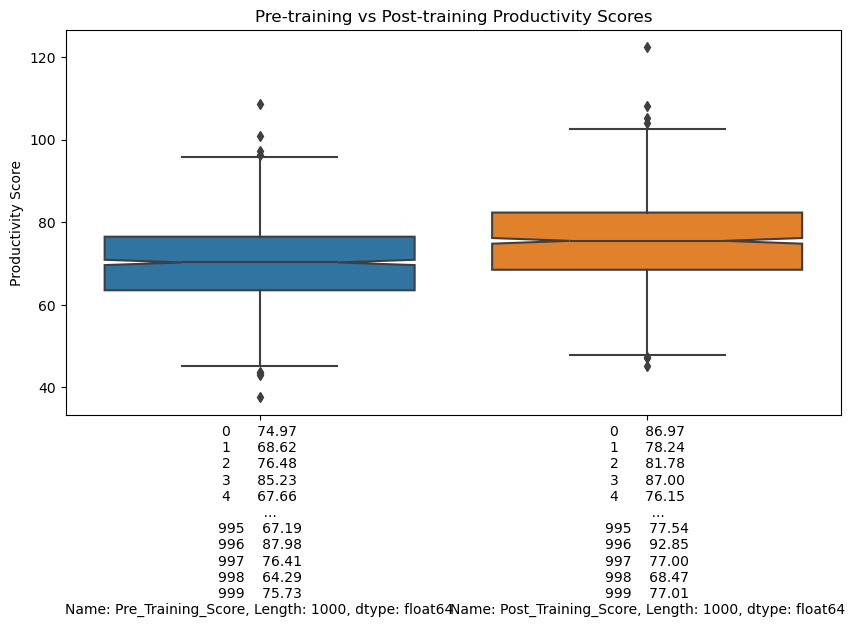

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(data=[pre_training_score,post_training_score],notch=True)
plt.xticks([0,1],[pre_training_score,post_training_score])
plt.title('Pre-training vs Post-training Productivity Scores')
plt.ylabel('Productivity Score')
plt.show()

## 4.Interpret the results and conclude whether the training program has a significant impact.

In [54]:
alpha = 0.05

### Testing my P_Value

In [55]:
print(p_value)
print(alpha)
p2 = p_value.round(2)
print(p2)

1.3042718223108973e-168
0.05
0.0


In [56]:
if p_value < alpha:
  print("Accept H1; the Alternative hypothesis is True. In other words the new training program has significantly improved productivity scores")
else:
  print("Accept H0; the Null hypothesis is True. In other words the new training program has not significantly improved productivity scores")

Accept H1; the Alternative hypothesis is True. In other words the new training program has significantly improved productivity scores


## Extra code Just for control purposes

### Compare the means of the two productivity scores

In [57]:
pre_training_mean = round(pre_training_score.mean(),2)
post_training_mean = round(post_training_score.mean(),2)
mean_diff = round(post_training_mean - pre_training_mean,2)
mean_percent_improvement = round((mean_diff / pre_training_mean) * 100,2)
print(f"The Pre-training average is: {pre_training_mean}, while the post-training: {post_training_mean}, meaning the Employee productivity score improved by: {mean_diff}")
print(f"In simple terms the Average employee productivity score improved by: {mean_percent_improvement} %")

The Pre-training average is: 70.19, while the post-training: 75.55, meaning the Employee productivity score improved by: 5.36
In simple terms the Average employee productivity score improved by: 7.64 %


### Compare the lowest minimum of the two productivity scores

In [58]:
lowest_PScore_preTraining = round(pre_training_score.min(),2)
lowest_PScore_postTraining = round(post_training_score.min(),2)
min_diff = round(lowest_PScore_postTraining - lowest_PScore_preTraining,2)
min_percent_impr = round((min_diff / lowest_PScore_preTraining) * 100, 2)
print(f"The lowest score pre-training is: {lowest_PScore_preTraining}, while the lowest score post training is: {lowest_PScore_postTraining}, it improved by: {min_diff}")
print(f"This means the lowest score went increased by: {min_percent_impr} %")

The lowest score pre-training is: 37.59, while the lowest score post training is: 45.28, it improved by: 7.69
This means the lowest score went increased by: 20.46 %


### Compare the highest maximum of the two productivity scores

In [59]:
highest_PScore_preTraining = round(pre_training_score.max(),2)
highest_PScore_postTraining = round(post_training_score.max(),2)
max_diff = round(highest_PScore_postTraining - highest_PScore_preTraining,2)
max_percent_impr = round((max_diff / highest_PScore_preTraining) * 100 , 2)
print(f"The highest score pre-training is: {highest_PScore_preTraining}, while the highest score post training is: {highest_PScore_postTraining}, it improved by: {max_diff}")
print(f"Therefore the highest productivity score increased by : {max_percent_impr} %")

The highest score pre-training is: 108.53, while the highest score post training is: 122.28, it improved by: 13.75
Therefore the highest productivity score increased by : 12.67 %
